# Momento de Retroalimentación: Módulo 2 Uso de framework o biblioteca de aprendizaje máquina para la implementación de una solución.

Federico Medina A01721441

Programa uno de los algoritmos vistos en el módulo (o que tu profesor de módulo autorice) haciendo uso de una biblioteca o framework de aprendizaje máquina. Lo que se busca es que demuestres tu conocimiento sobre el framework y como configurar el algoritmo. Prueba tu implementación con un set de datos y realiza algunas predicciones.

- Dataset utilizado: https://www.kaggle.com/datasets/bhuviranga/co2-emissions?select=CO2+Emissions.csv
- Modelo a implementar: Regresión Lineal

El dataframe utilizado habla sobre cuánto Dioxido de Carbono un automovil suelta dependiendo de las diferentes variables que lo conforman. En este caso, obtenemos un dataframe que contiene:
- **Make**: la marca del carro
- **Model**: el nombre del auto
- **Vehicle Class**: el tipo de carro
- **Engine Size (L)**: el tamaño en litros del motor
- **Cylinders**: la cantidad de cilindros que tiene
- **Transmission**: el tipo de transmisión
- **Fuel Type**: qué tipo de gasolina utiliza
- **Fuel Consumption City (L/100 km)**: la cantidad de gasolina que utiliza en una ciudad en 100km.
- **Fuel Consumption Hwy (L/100 km)**: la cantidad de gasolina que utiliza en una carretera en 100km.
- **Fuel Consumption Comb (L/100 km)**: el promedio de gasolina que utilzia contando la ciudad y la carretera en 100km.
- **CO2 Emissions(g/km)**: la cantidad de gramos de CO2 que produce cada km.

En total se cuenta con 7385 registros y se busca utilizar las variables anteriores para poder predecir la última variable (CO2 Emissions(g/km)). La variable objetivo cuenta con una salida de valores enteros los cuales representan la cantidad de gramos de CO2 que se emite cada km.

#### Librerias Utilizadas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing

#### Lectura de Datos

In [3]:
df = pd.read_csv("CO2 Emissions.csv")
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


#### Descripción de los Datos

In [4]:
df.describe() #Observamos la descripción de los datos del dataframe

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


In [5]:
df.isnull().sum() #buscamos si hay algún valor nulo en la base de datos, sin embargo, no se encuentra ninguno por lo que la base está completa

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

#### Análisis de Datos

In [6]:
#Eliminamos las columnas que no se considerarán para el análisis

df = df.drop(columns=["Model", "Make", "Vehicle Class", "Transmission", "Fuel Type"])

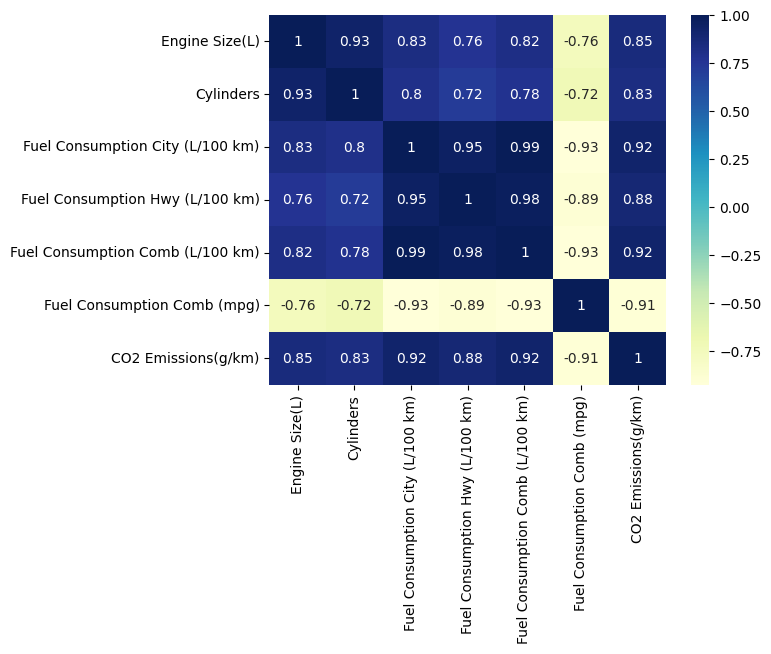

In [7]:
# Gráficar un heatmap de correlación
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

A diferencia de la actividad anterior (sin el uso de framework) esta vez se utilizarán todos los datos anteriores para predecir el valor de CO2 Emissions ya que sabemos que todos los valores tienen una alta correlación lineal con CO2 Emissions.

#### Implementación de la Regresión Lineal

In [8]:
X = df.drop(columns=['CO2 Emissions(g/km)'])
y = df['CO2 Emissions(g/km)']


# crear las variables de entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [9]:
# crear el modelo

model = LinearRegression()
model.fit(X_train,y_train) 

LinearRegression()

In [10]:
# predecir los valores de CO2 Emissions
predictions = model.predict(X_test)

In [11]:
# imprimimos los valores de los coeficientes
print('Beta_0 = ', model.intercept_)
print(model.coef_)

Beta_0 =  225.84499776579733
[ 4.18898012  7.97012599  0.47537857  5.14084961  0.74946751 -3.41950553]


Con los resultados arrojados anteriormente, observamos que la regresión está descrita por la ecuación $y = \beta_0 + \beta_1 * x_1 ... \beta_6 * x_6$ donde los valores de $\beta$ son:

- $\beta_0$ = 225.8449977
- $\beta_1$ = 4.18898012
- $\beta_2$ = 7.97012599
- $\beta_3$ = 0.47537857
- $\beta_4$ = 5.14084961
- $\beta_5$ = 0.74946751
- $\beta_6$ = -3.41950553

y los valores de $x_k$ representan los valores de cada una de las variables que se establecieron.

In [12]:
# imprimir los valores de los errores

print('Error Medio Cuadrado: ', mean_squared_error(y_test, predictions))
print('Error Medio Absoluto: ', mean_absolute_error(y_test, predictions))
print('Coeficiente del modelo: ', model.score(X_train,y_train))

Error Medio Cuadrado:  324.4878152871343
Error Medio Absoluto:  11.207628157370792
Coeficiente del modelo:  0.903816946102582


#### Evaluación del modelo

Ahora para hacer predicciones agarraremos el primer valor del df que es:

- 2.0: Engine Size
- 4: Cylinders
- 9.9: Fuel Consumption City
- 6.7: Fuel Consumption Hwy
- 8.5: Fuel Consumption Comb (L/100km)
- 33: Fuel Consumption Comb (mpg)
- 196: CO2 Emissions

In [13]:
df.iloc[0]

Engine Size(L)                        2.0
Cylinders                             4.0
Fuel Consumption City (L/100 km)      9.9
Fuel Consumption Hwy (L/100 km)       6.7
Fuel Consumption Comb (L/100 km)      8.5
Fuel Consumption Comb (mpg)          33.0
CO2 Emissions(g/km)                 196.0
Name: 0, dtype: float64

In [14]:
#Verificamos resultado
h_196 = model.intercept_ + model.coef_[0]*2 + model.coef_[1]*4 + model.coef_[2]*9.9 + model.coef_[3]*6.7 + model.coef_[4]*8.5 + model.coef_[5]*33
h_196

198.7801934945991

Observamos que el modelo da un valor bastante cerca al real, siendo el valor predecido 198.78 mientras que el real es de 196. 

Ahora intentaremos lo mismo pero para el segundo y tercer valor del df que es:

**2da verificación**
- 2.4: Engine Size
- 4: Cylinders
- 11.2: Fuel Consumption City
- 7.7: Fuel Consumption Hwy
- 9.6: Fuel Consumption Comb (L/100km)
- 29: Fuel Consumption Comb (mpg)
- 221: CO2 Emissions


**3ra verificación**
- 1.5: Engine Size
- 4: Cylinders
- 6: Fuel Consumption City
- 5.8: Fuel Consumption Hwy
- 5.9: Fuel Consumption Comb (L/100km)
- 48: Fuel Consumption Comb (mpg)
- 136: CO2 Emissions

In [15]:
df.iloc[1]

Engine Size(L)                        2.4
Cylinders                             4.0
Fuel Consumption City (L/100 km)     11.2
Fuel Consumption Hwy (L/100 km)       7.7
Fuel Consumption Comb (L/100 km)      9.6
Fuel Consumption Comb (mpg)          29.0
CO2 Emissions(g/km)                 221.0
Name: 1, dtype: float64

In [16]:
#Verificamos resultado
h_221 = model.intercept_ + model.coef_[0]*2.4 + model.coef_[1]*4 + model.coef_[2]*11.2 + model.coef_[3]*7.7 + model.coef_[4]*9.6 + model.coef_[5]*29
h_221

220.7170636693004

Observamos que para la segunda verificación, el modelo predice un dato de 220.71 mientras que el valor real es de 221, lo cual es muy cercano a lo que se estaba buscando obtener.

In [17]:
df.iloc[2]

Engine Size(L)                        1.5
Cylinders                             4.0
Fuel Consumption City (L/100 km)      6.0
Fuel Consumption Hwy (L/100 km)       5.8
Fuel Consumption Comb (L/100 km)      5.9
Fuel Consumption Comb (mpg)          48.0
CO2 Emissions(g/km)                 136.0
Name: 2, dtype: float64

In [18]:
#Verificamos resultado
h_136 = model.intercept_ + model.coef_[0]*1.5 + model.coef_[1]*4 + model.coef_[2]*6 + model.coef_[3]*5.8 + model.coef_[4]*5.9 + model.coef_[5]*48
h_136

136.9637638934223

Ahora con la tercer verificación, se obtuvo un valor de 136.96 contra el 136 real, lo cual mantiene la postura de que el modelo logra predecir los datos en base a los parámetros que se le dieron. Con esto y al observar los valores del Error Medio cuadrado y del Error Medio Absoluto, al igual que el coeficiente de correlación del modelo, podemos asegurar que el modelo es muy bueno para predecir valores dentro del dataset.